<a href="https://colab.research.google.com/github/Hilary824/Hilary824/blob/main/HW10_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MNIST***



In [49]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [50]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

x_train=x_train.reshape(60000,28*28)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,28*28)
x_test=x_test.astype('float32')/255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.save('mnist_model.h5')
from keras.models import load_model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit (x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test Accuracy:',test_acc)
if test_acc>0.90:
    model.save('mnist_model.h5')
    print('Model saved')


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8804 - loss: 0.3972 - val_accuracy: 0.9630 - val_loss: 0.1153
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9729 - loss: 0.0896 - val_accuracy: 0.9743 - val_loss: 0.0823
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9812 - loss: 0.0592 - val_accuracy: 0.9680 - val_loss: 0.1098
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9861 - loss: 0.0432 - val_accuracy: 0.9752 - val_loss: 0.0813
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9881 - loss: 0.0365 - val_accuracy: 0.9755 - val_loss: 0.0917
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9896 - loss: 0.0322 - val_accuracy: 0.9774 - val_loss: 0.0829
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9917 - loss: 0.0269 - val_accuracy: 0.9788 - val_loss: 0.0860
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9924 - loss: 0.0236 - 

Test Accuracy: 0.9822999835014343
Model saved


In [52]:
from keras.models import load_model
model=load_model('mnist_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


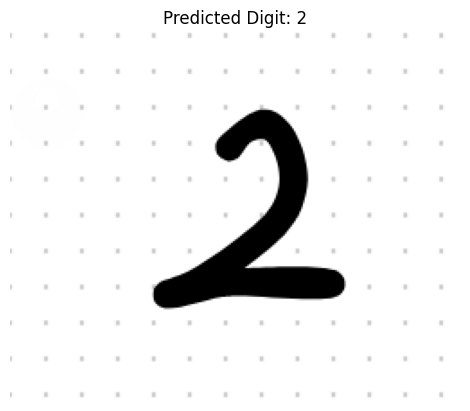

Image: /content/drive/MyDrive/ảnhdigit/ảnh1.png,Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


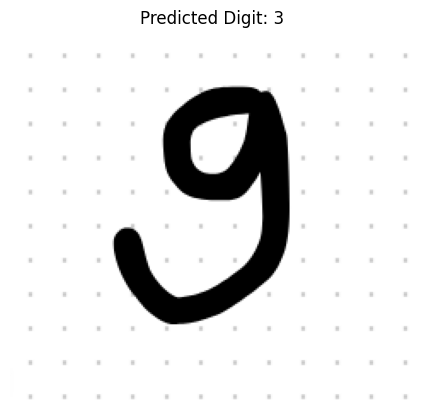

Image: /content/drive/MyDrive/ảnhdigit/Screenshot 2025-03-15 235820.png,Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


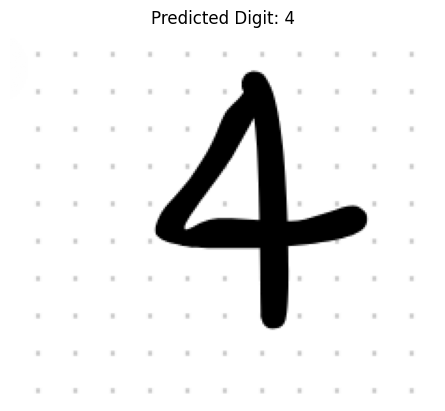

Image: /content/drive/MyDrive/ảnhdigit/Screenshot 2025-03-15 235823.png,Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


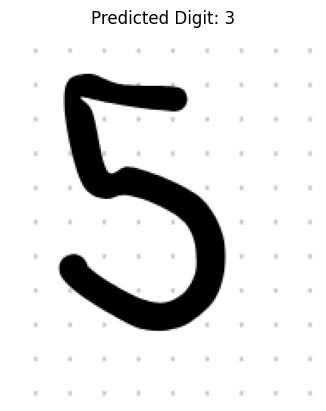

Image: /content/drive/MyDrive/ảnhdigit/Screenshot 2025-03-15 235826.png,Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


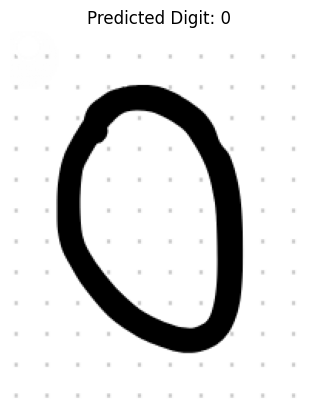

Image: /content/drive/MyDrive/ảnhdigit/Screenshot 2025-03-15 235829.png,Predicted Digit: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


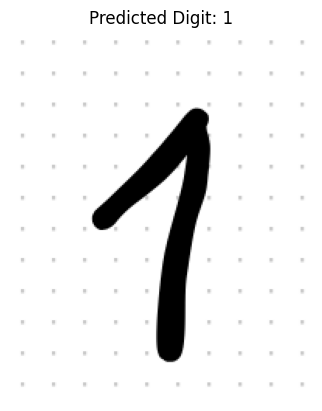

Image: /content/drive/MyDrive/ảnhdigit/Screenshot 2025-03-16 155817.png,Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


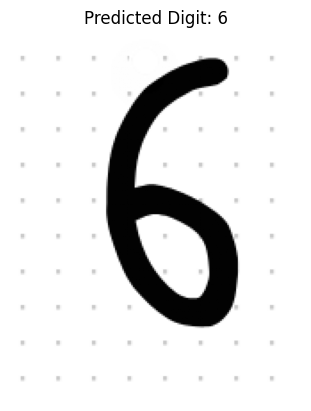

Image: /content/drive/MyDrive/ảnhdigit/Screenshot 2025-03-16 155823.png,Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


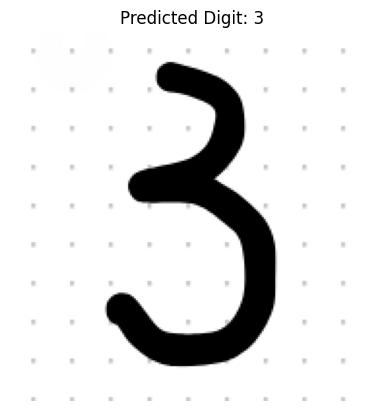

Image: /content/drive/MyDrive/ảnhdigit/Screenshot 2025-03-16 155821.png,Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


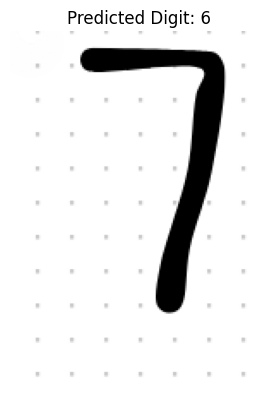

Image: /content/drive/MyDrive/ảnhdigit/Screenshot 2025-03-16 155826.png,Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


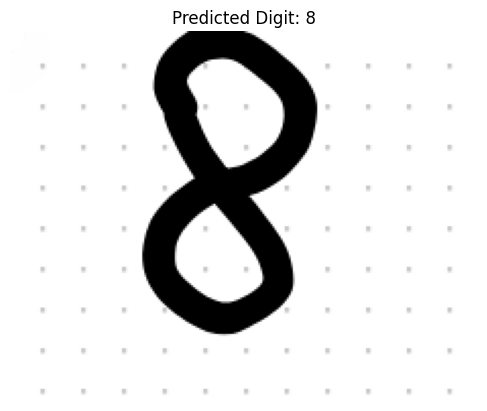

Image: /content/drive/MyDrive/ảnhdigit/Screenshot 2025-03-16 155831.png,Predicted Digit: 8


In [54]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
def preprocess_image (image_path):
  img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
  img=cv2.resize(img, (28,28))
  img=cv2.bitwise_not(img)
  img=img.astype('float32')/255.0
  return img
def predict_digit(image_path):
  processed_img= preprocess_image(image_path)
  prediction=model.predict(processed_img.reshape(1,784))
  predicted_digit=np.argmax(prediction)
  img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
  plt.imshow(img,cmap='gray')
  plt.title(f'Predicted Digit: {predicted_digit}')
  plt.axis('off')
  plt.show()
  return predicted_digit

image_dir = '/content/drive/MyDrive/ảnhdigit'
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg'))]

for image_path in image_paths:
 predicted_digit=predict_digit(image_path)
 print(f'Image: {image_path},Predicted Digit: {predicted_digit}')



# ***CIFAR10***

In [72]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(112,activation='relu'))
model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=64,validation_data=(x_test,y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test Accuracy:{test_acc}')

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.2775 - loss: 1.9924 - val_accuracy: 0.4121 - val_loss: 1.6818
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.3907 - loss: 1.6973 - val_accuracy: 0.4185 - val_loss: 1.6410
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.4248 - loss: 1.6062 - val_accuracy: 0.4151 - val_loss: 1.6230
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.4506 - loss: 1.5314 - val_accuracy: 0.4454 - val_loss: 1.5560
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.4654 - loss: 1.4941 - val_accuracy: 0.4625 - val_loss: 1.5166
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.4788 - loss: 1.4480 - val_accuracy: 0.4673 - val_loss: 1.5060
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.4929 - loss: 1.4170 - val_accuracy: 0.4778 - val_loss: 1.4696
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.4987 - loss: 1

In [74]:
model.save('/content/drive/MyDrive/cifar10.h5')
print('Model saved')


Model saved


In [75]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/cifar10.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


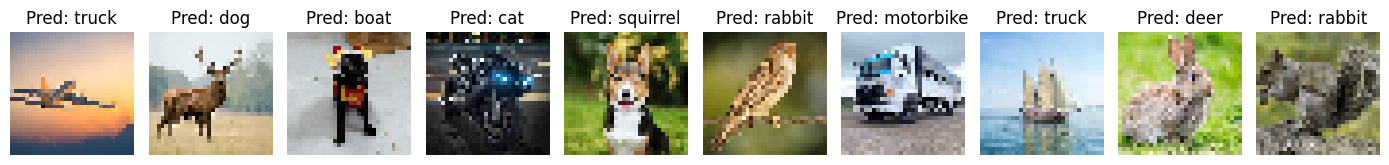

In [79]:
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt
loaded_model = load_model('/content/drive/MyDrive/cifar10.h5')
image_dir = '/content/drive/MyDrive/cifar10'
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg'))]
name = ['dog', 'cat', 'deer', 'boat', 'rabbit', 'bird', 'squirrel', 'plane', 'truck', 'motorbike']
plt.figure(figsize=(14, 7))
for i, image_path in enumerate(image_paths[:10]):
 loaded_img= load_img(image_path,target_size=(32,32))
 img=img_to_array(loaded_img)
 img=img.reshape(1,32*32*3)
 img=img.astype('float32')
 img=img/255.0
 prediction = loaded_model.predict(img)
 predict_digit =name[np.argmax(prediction)]
 np.argmax(model.predict(img), axis=-1)
 plt.subplot(1, 10, i+1)
 plt.imshow(loaded_img)
 plt.title(f"Pred: {predict_digit}")
 plt.axis('off')

plt.tight_layout()
plt.show()



# ***CIFAR100***

In [112]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(112,activation='relu'))
model.add(Dense(100,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=64,validation_data=(x_test,y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test Accuracy:{test_acc}')

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.0353 - loss: 4.4078 - val_accuracy: 0.1016 - val_loss: 3.9072
Epoch 2/100
  3/782 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.0556 - loss: 4.1277

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/cifar100.h5')

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt
loaded_model = load_model('/content/drive/MyDrive/cifar100.h5')
image_dir = '/content/drive/MyDrive/cifar100'
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg'))]
name = ['dog', 'cat', 'deer', 'boat', 'rabbit', 'bird', 'squirrel', 'plane', 'truck', 'motorbike']
plt.figure(figsize=(14, 7))
for i, image_path in enumerate(image_paths[:10]):
 loaded_img= load_img(image_path,target_size=(32,32))
 img=img_to_array(loaded_img)
 img=img.reshape(1,32*32*3)
 img=img.astype('float32')
 img=img/255.0
 prediction = loaded_model.predict(img)
 predict_digit =name[np.argmax(prediction)]
 np.argmax(model.predict(img), axis=-1)
 plt.subplot(1, 10, i+1)
 plt.imshow(loaded_img)
 plt.title(f"Pred: {predict_digit}")
 plt.axis('off')

plt.tight_layout()
plt.show()


# ***FASHION MNIST***

In [106]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train=x_train.reshape(60000,28*28)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,28*28)
x_test=x_test.astype('float32')/255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.save('fashion_mnist.h5')
from keras.models import load_model
model.add(Dense(10,activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test Accuracy:{test_acc}')
model.save('fashion_mnist.h5')
print('Model saved')

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.3375 - loss: 1.8977 - val_accuracy: 0.3722 - val_loss: 1.5334
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.3793 - loss: 1.4742 - val_accuracy: 0.4790 - val_loss: 1.2781
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.5075 - loss: 1.1968 - val_accuracy: 0.5698 - val_loss: 1.0666
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6241 - loss: 0.9878 - val_accuracy: 0.6972 - val_loss: 0.8796
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7253 - loss: 0.8377 - val_accuracy: 0.7725 - val_loss: 0.7895
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.7846 - loss: 0.7461 - val_accuracy: 0.8217 - val_loss: 0.6943
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.8558 - loss: 0.6487 - val_accuracy: 0.8490 - val_loss: 0.6297
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8748 - loss: 0.5770 - 

Test Accuracy:0.8921999931335449
Model saved


In [105]:
from keras.models import load_model
model=load_model('/content/fashion_mnist.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


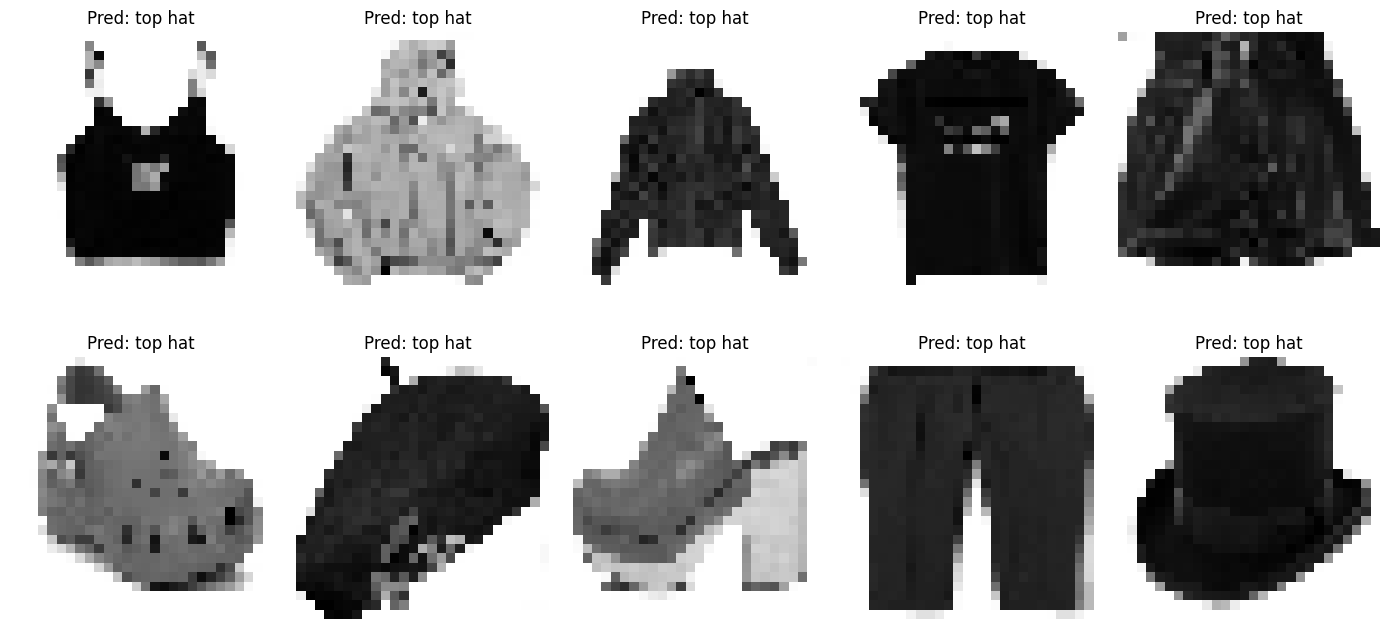

In [108]:
import numpy as np
import os
import matplotlib.pyplot as plt
loaded_model = load_model('/content/drive/MyDrive/fashion_mnist.h5')
image_dir = '/content/drive/MyDrive/fashion_mnist'
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg'))]
name = ['top hat', 'beret', 'slacks', 'shorts', 'hoddie', 'T-shirt', 'croptop', 'turtleneck', 'clogs', 'crocs']
plt.figure(figsize=(14, 7))
for i, image_path in enumerate(image_paths[:10]):
 loaded_img= load_img(image_path,target_size=(28,28),color_mode='grayscale')
 img=img_to_array(loaded_img)
 img=img.reshape(1,28*28)
 img=img.astype('float32')
 img=img/255.0
 prediction = loaded_model.predict(img)
 predict_digit =name[np.argmax(prediction)]
 np.argmax(model.predict(img), axis=-1)
 plt.subplot(2, 5, i+1)
 plt.imshow(loaded_img,cmap='gray')
 plt.title(f"Pred: {predict_digit}")
 plt.axis('off')

plt.tight_layout()
plt.show()